In [68]:
import pandas as pd

survey_df = pd.read_csv('https://raw.githubusercontent.com/ahmedfaridkhan/item-estimation-survey/main/survey_results.csv', skiprows=[1, 2], header=0)

In [69]:
survey_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,treatment 2,control,Q1,Q2,Q3,Q4,Q5,Q6,Gender,Age
0,2024-02-25 16:51:25,2024-02-25 16:51:49,IP Address,128.197.29.250,25,23,False,2024-02-27 13:17:06,R_1p77grDRCEMPuUh,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-25 16:51:37,2024-02-25 16:51:51,IP Address,104.28.39.33,40,14,False,2024-02-27 13:17:06,R_10TP6Y7vnC7qWyZ,NaN,...,NaN,Lars Halden,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-25 16:51:05,2024-02-25 16:51:08,IP Address,73.114.90.18,15,2,False,2024-02-27 13:17:06,R_5duQQMZiY4URHTj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-25 16:51:50,2024-02-25 16:52:14,IP Address,73.114.90.18,30,23,False,2024-02-27 13:17:06,R_539imJmHt0BG62t,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-25 16:54:06,2024-02-25 16:54:16,IP Address,104.28.39.129,30,9,False,2024-02-27 13:17:06,R_1VfhtThagGFH9L3,NaN,...,NaN,Lars Halden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2024-02-29 11:57:11,2024-02-29 11:59:36,IP Address,172.225.83.33,100,144,True,2024-02-29 11:59:36,R_3uOIpbdYPMUhoVf,NaN,...,102.0,NaN,10.0,450.0,900.0,600.0,1200.0,500,Male,21.0
192,2024-02-29 11:58:59,2024-02-29 12:03:27,IP Address,177.26.246.187,100,267,True,2024-02-29 12:03:27,R_1urnRSgjoeRsXaY,NaN,...,102.0,NaN,10.0,320.0,216.0,60.0,480.0,280,Male,47.0
193,2024-02-29 12:02:27,2024-02-29 12:04:28,IP Address,2.80.133.249,100,121,True,2024-02-29 12:04:28,R_7WONHYpFQsvtvbX,NaN,...,NaN,Lars Halden,12.0,200.0,50.0,30.0,100.0,150,Female,34.0
194,2024-02-29 12:06:25,2024-02-29 12:12:48,IP Address,187.181.208.123,100,382,True,2024-02-29 12:12:48,R_6GqTi8nY1GhkBZ2,NaN,...,102.0,NaN,11.0,204.0,240.0,105.0,200.0,240,Female,20.0


In [70]:
survey_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'treatment 1', 'treatment 2',
       'control', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Gender', 'Age'],
      dtype='object')

In [71]:
survey_df = survey_df.drop(['StartDate', 'EndDate', 'Status', 'Duration (in seconds)', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName',\
       'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage'], axis = 1)

In [72]:
survey_df

,IPAddress,Progress,Finished,treatment 1,treatment 2,control,Q1,Q2,Q3,Q4,Q5,Q6,Gender,Age
0,128.197.29.250,25,False,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104.28.39.33,40,False,NaN,NaN,Lars Halden,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73.114.90.18,15,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73.114.90.18,30,False,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104.28.39.129,30,False,NaN,NaN,Lars Halden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,172.225.83.33,100,True,NaN,102.0,NaN,10.0,450.0,900.0,600.0,1200.0,500,Male,21.0
192,177.26.246.187,100,True,NaN,102.0,NaN,10.0,320.0,216.0,60.0,480.0,280,Male,47.0
193,2.80.133.249,100,True,NaN,NaN,Lars Halden,12.0,200.0,50.0,30.0,100.0,150,Female,34.0
194,187.181.208.123,100,True,NaN,102.0,NaN,11.0,204.0,240.0,105.0,200.0,240,Female,20.0


<Axes: >

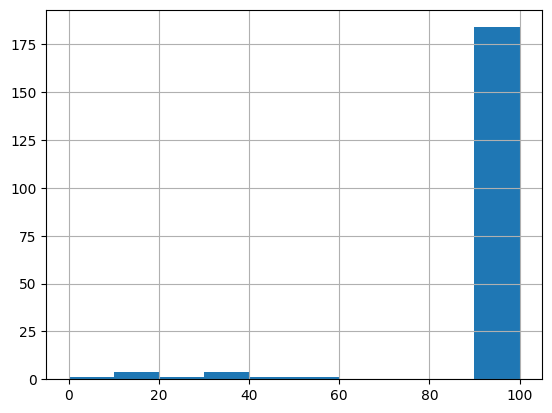

In [73]:
survey_df.Progress.hist()

In [74]:
survey_df.Progress.value_counts()

100    183
15       4
30       3
25       1
40       1
0        1
50       1
33       1
90       1
Name: Progress, dtype: int64

In [75]:
survey_df.Finished.value_counts()

True     183
False     13
Name: Finished, dtype: int64

In [76]:
survey_df = survey_df[survey_df['Finished'] == True]

In [77]:
survey_df = survey_df.reset_index(drop=True)

In [78]:
survey_df

,IPAddress,Progress,Finished,treatment 1,treatment 2,control,Q1,Q2,Q3,Q4,Q5,Q6,Gender,Age
0,77.164.41.88,100,True,9.0,NaN,NaN,11.0,160.0,180.0,60.0,280.0,180,Female,22.0
1,172.225.170.111,100,True,NaN,102.0,NaN,20.0,100.0,70.0,40.0,200.0,150,Male,30.0
2,190.111.246.27,100,True,NaN,102.0,NaN,10.0,300.0,140.0,50.0,550.0,350,Female,26.0
3,67.205.195.178,100,True,NaN,NaN,Ingrid Johansen,10.0,500.0,180.0,90.0,350.0,1200,Male,53.0
4,172.58.134.27,100,True,NaN,NaN,Lars Halden,10.0,100.0,120.0,40.0,800.0,90,Female,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,172.225.83.33,100,True,NaN,102.0,NaN,10.0,450.0,900.0,600.0,1200.0,500,Male,21.0
179,177.26.246.187,100,True,NaN,102.0,NaN,10.0,320.0,216.0,60.0,480.0,280,Male,47.0
180,2.80.133.249,100,True,NaN,NaN,Lars Halden,12.0,200.0,50.0,30.0,100.0,150,Female,34.0
181,187.181.208.123,100,True,NaN,102.0,NaN,11.0,204.0,240.0,105.0,200.0,240,Female,20.0


In [79]:
len(survey_df)

183

In [80]:
import numpy as np

survey_df['group'] = 'control'  # Set a default value for the 'group' column

for value in range(len(survey_df)):
    if pd.isna(survey_df['treatment 1'].iloc[value]) and pd.isna(survey_df['treatment 2'].iloc[value]):
        survey_df['group'].iloc[value] = 'control'
    elif pd.isna(survey_df['control'].iloc[value]) and pd.isna(survey_df['treatment 2'].iloc[value]):
        survey_df['group'].iloc[value] = 'treatment 1'
    else:
        survey_df['group'].iloc[value] = 'treatment 2'

<ipython-input-80-c6d2a29007b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['group'].iloc[value] = 'treatment 1'
<ipython-input-80-c6d2a29007b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['group'].iloc[value] = 'treatment 2'
<ipython-input-80-c6d2a29007b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['group'].iloc[value] = 'control'


In [81]:
survey_df

,IPAddress,Progress,Finished,treatment 1,treatment 2,control,Q1,Q2,Q3,Q4,Q5,Q6,Gender,Age,group
0,77.164.41.88,100,True,9.0,NaN,NaN,11.0,160.0,180.0,60.0,280.0,180,Female,22.0,treatment 1
1,172.225.170.111,100,True,NaN,102.0,NaN,20.0,100.0,70.0,40.0,200.0,150,Male,30.0,treatment 2
2,190.111.246.27,100,True,NaN,102.0,NaN,10.0,300.0,140.0,50.0,550.0,350,Female,26.0,treatment 2
3,67.205.195.178,100,True,NaN,NaN,Ingrid Johansen,10.0,500.0,180.0,90.0,350.0,1200,Male,53.0,control
4,172.58.134.27,100,True,NaN,NaN,Lars Halden,10.0,100.0,120.0,40.0,800.0,90,Female,23.0,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,172.225.83.33,100,True,NaN,102.0,NaN,10.0,450.0,900.0,600.0,1200.0,500,Male,21.0,treatment 2
179,177.26.246.187,100,True,NaN,102.0,NaN,10.0,320.0,216.0,60.0,480.0,280,Male,47.0,treatment 2
180,2.80.133.249,100,True,NaN,NaN,Lars Halden,12.0,200.0,50.0,30.0,100.0,150,Female,34.0,control
181,187.181.208.123,100,True,NaN,102.0,NaN,11.0,204.0,240.0,105.0,200.0,240,Female,20.0,treatment 2


In [82]:
survey_df = survey_df.drop(['Progress', 'Finished', 'treatment 1', 'treatment 2', 'control'], axis = 1)

In [83]:
survey_df

,IPAddress,Q1,Q2,Q3,Q4,Q5,Q6,Gender,Age,group
0,77.164.41.88,11.0,160.0,180.0,60.0,280.0,180,Female,22.0,treatment 1
1,172.225.170.111,20.0,100.0,70.0,40.0,200.0,150,Male,30.0,treatment 2
2,190.111.246.27,10.0,300.0,140.0,50.0,550.0,350,Female,26.0,treatment 2
3,67.205.195.178,10.0,500.0,180.0,90.0,350.0,1200,Male,53.0,control
4,172.58.134.27,10.0,100.0,120.0,40.0,800.0,90,Female,23.0,control
...,...,...,...,...,...,...,...,...,...,...
178,172.225.83.33,10.0,450.0,900.0,600.0,1200.0,500,Male,21.0,treatment 2
179,177.26.246.187,10.0,320.0,216.0,60.0,480.0,280,Male,47.0,treatment 2
180,2.80.133.249,12.0,200.0,50.0,30.0,100.0,150,Female,34.0,control
181,187.181.208.123,11.0,204.0,240.0,105.0,200.0,240,Female,20.0,treatment 2


In [86]:
survey_df.group.value_counts()

treatment 2    70
control        65
treatment 1    48
Name: group, dtype: int64

In [89]:
survey_df = survey_df.drop_duplicates(subset = ['IPAddress'], keep = 'first')

In [90]:
survey_df

,IPAddress,Q1,Q2,Q3,Q4,Q5,Q6,Gender,Age,group
0,77.164.41.88,11.0,160.0,180.0,60.0,280.0,180,Female,22.0,treatment 1
1,172.225.170.111,20.0,100.0,70.0,40.0,200.0,150,Male,30.0,treatment 2
2,190.111.246.27,10.0,300.0,140.0,50.0,550.0,350,Female,26.0,treatment 2
3,67.205.195.178,10.0,500.0,180.0,90.0,350.0,1200,Male,53.0,control
4,172.58.134.27,10.0,100.0,120.0,40.0,800.0,90,Female,23.0,control
...,...,...,...,...,...,...,...,...,...,...
178,172.225.83.33,10.0,450.0,900.0,600.0,1200.0,500,Male,21.0,treatment 2
179,177.26.246.187,10.0,320.0,216.0,60.0,480.0,280,Male,47.0,treatment 2
180,2.80.133.249,12.0,200.0,50.0,30.0,100.0,150,Female,34.0,control
181,187.181.208.123,11.0,204.0,240.0,105.0,200.0,240,Female,20.0,treatment 2
